### Preprocessing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("all_data_updated.csv", index_col = 0)

In [2]:
# Look at the data
data.head()

,recordnum,cardnum,date,merchnum,merch.description,merch.state,merch.zip,transtype,amount,fraud,...,merchnum_per_card_14,merchnum_per_card_28,merchant_frequency_3,merchant_frequency_7,merchant_frequency_14,merchant_frequency_28,card_frequency_3,card_frequency_7,card_frequency_14,card_frequency_28
1,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,NaN,...,1,1,1,1,1,1,1,1,1,1
2,2,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,NaN,...,1,1,2,2,2,2,2,2,2,2
3,3,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,NaN,...,1,1,3,3,3,3,3,3,3,3
4,4,5142152067,2010-01-01,5509006296254,FEDEX SHP 12/21/09 AB#,TN,38118,P,3.67,NaN,...,1,1,4,4,4,4,1,1,1,1
5,5,5142132941,2010-01-01,5509006296254,FEDEX SHP 12/27/09 AB#,TN,38118,P,3.62,NaN,...,1,1,5,5,5,5,1,1,1,1


In [3]:
# test for NAN
print pd.isnull(data).any()
# fill NAN with 0 in "fraud" column
data = data.fillna(0)
data.head()

recordnum                       False
cardnum                         False
date                            False
merchnum                        False
merch.description               False
merch.state                     False
merch.zip                       False
transtype                       False
amount                          False
fraud                            True
card_amount_to_avg_3            False
card_amount_to_max_3            False
card_amount_to_median_3         False
card_amount_to_total_3          False
merchant_amount_to_avg_3        False
merchant_amount_to_max_3        False
merchant_amount_to_median_3     False
merchant_amount_to_total_3      False
card_amount_to_avg_7            False
card_amount_to_max_7            False
card_amount_to_median_7         False
card_amount_to_total_7          False
merchant_amount_to_avg_7        False
merchant_amount_to_max_7        False
merchant_amount_to_median_7     False
merchant_amount_to_total_7      False
card_amount_

,recordnum,cardnum,date,merchnum,merch.description,merch.state,merch.zip,transtype,amount,fraud,...,merchnum_per_card_14,merchnum_per_card_28,merchant_frequency_3,merchant_frequency_7,merchant_frequency_14,merchant_frequency_28,card_frequency_3,card_frequency_7,card_frequency_14,card_frequency_28
1,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0.0,...,1,1,1,1,1,1,1,1,1,1
2,2,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0.0,...,1,1,2,2,2,2,2,2,2,2
3,3,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0.0,...,1,1,3,3,3,3,3,3,3,3
4,4,5142152067,2010-01-01,5509006296254,FEDEX SHP 12/21/09 AB#,TN,38118,P,3.67,0.0,...,1,1,4,4,4,4,1,1,1,1
5,5,5142132941,2010-01-01,5509006296254,FEDEX SHP 12/27/09 AB#,TN,38118,P,3.62,0.0,...,1,1,5,5,5,5,1,1,1,1


In [4]:
# only keep the data after 28 days
df = data[data["date"]>"2010-01-28"]
# only extract the label and features columns
df = df.iloc[:,9:]
print df.shape
df.head()

(88621, 57)


,fraud,card_amount_to_avg_3,card_amount_to_max_3,card_amount_to_median_3,card_amount_to_total_3,merchant_amount_to_avg_3,merchant_amount_to_max_3,merchant_amount_to_median_3,merchant_amount_to_total_3,card_amount_to_avg_7,...,merchnum_per_card_14,merchnum_per_card_28,merchant_frequency_3,merchant_frequency_7,merchant_frequency_14,merchant_frequency_28,card_frequency_3,card_frequency_7,card_frequency_14,card_frequency_28
6387,0.0,0.667055,0.667055,0.667055,0.667055,0.065900,0.065900,0.065900,0.065900,0.667055,...,2,2,2,2,2,3,2,2,3,3
6388,0.0,0.050678,0.050678,0.050678,0.050678,0.535842,0.535842,0.535842,0.535842,0.038454,...,3,6,2,2,2,2,2,4,5,8
6389,0.0,3.743966,2.065000,3.743966,1.871983,1.000000,0.000000,1.000000,0.000000,6.807755,...,8,10,1,1,1,1,3,7,13,15
6390,0.0,0.740060,0.456971,0.740060,0.370030,1.000000,0.000000,1.000000,0.000000,1.103021,...,3,5,1,1,1,1,3,4,4,7
6391,0.0,0.192225,0.192225,0.192225,0.192225,0.230989,0.069375,0.324845,0.015399,0.192225,...,4,8,16,22,37,68,2,2,7,13


In [5]:
# split lables and features
labels = df["fraud"]
features = df.iloc[:,1:]

print sum(labels)
print len(labels)
print sum(labels)/len(labels)

295.0
88621
0.00332878211711


In [6]:
# import neccessary sklearn packages
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import clone

In [7]:
# pre-process dataset with z-scaling
df[df.columns[1:]] = scale(df[df.columns[1:]])
features = scale(features)

In [8]:
df

,fraud,card_amount_to_avg_3,card_amount_to_max_3,card_amount_to_median_3,card_amount_to_total_3,merchant_amount_to_avg_3,merchant_amount_to_max_3,merchant_amount_to_median_3,merchant_amount_to_total_3,card_amount_to_avg_7,...,merchnum_per_card_14,merchnum_per_card_28,merchant_frequency_3,merchant_frequency_7,merchant_frequency_14,merchant_frequency_28,card_frequency_3,card_frequency_7,card_frequency_14,card_frequency_28
6387,0.0,-0.069713,-0.048956,-0.091941,-0.038273,-0.201987,-0.094556,-0.220692,-0.077500,-0.059868,...,-0.618471,-0.788860,-0.343639,-0.379143,-0.388146,-0.387467,-0.236040,-0.333167,-0.432163,-0.560908
6388,0.0,-0.087416,-0.066921,-0.108029,-0.057062,-0.133731,-0.022105,-0.162222,-0.002350,-0.078011,...,-0.418964,-0.294452,-0.343639,-0.379143,-0.388146,-0.390234,-0.236040,-0.213197,-0.333148,-0.392973
6389,0.0,0.018664,-0.008213,-0.011633,-0.001544,-0.066316,-0.104716,-0.104471,-0.088039,0.117367,...,0.578570,0.199956,-0.361488,-0.388420,-0.393272,-0.393002,-0.150046,-0.033244,0.062912,-0.157863
6390,0.0,-0.067616,-0.055079,-0.090036,-0.047327,-0.066316,-0.104716,-0.104471,-0.088039,-0.047285,...,-0.418964,-0.418054,-0.361488,-0.388420,-0.393272,-0.393002,-0.150046,-0.213197,-0.382656,-0.426560
6391,0.0,-0.083351,-0.062795,-0.104334,-0.052747,-0.178009,-0.094020,-0.188474,-0.085576,-0.073573,...,-0.219457,-0.047248,-0.093762,-0.193618,-0.208743,-0.207576,-0.236040,-0.333167,-0.234133,-0.225037
6392,0.0,-0.071883,-0.056158,-0.093913,-0.049592,-0.117387,-0.094627,-0.106166,-0.086819,-0.056506,...,-0.817978,-0.788860,1.155626,2.004854,1.856948,1.660517,-0.150046,-0.093228,-0.234133,-0.292212
6393,0.0,-0.069205,-0.056158,-0.083251,-0.051649,-0.117000,-0.094627,-0.105324,-0.086828,-0.055660,...,-0.817978,-0.788860,1.173474,2.014130,1.862074,1.663285,-0.064052,-0.033244,-0.184626,-0.258624
6394,0.0,-0.060150,-0.068398,-0.083251,-0.058607,-0.113472,-0.094293,-0.100346,-0.086798,-0.069245,...,-0.618471,-0.418054,1.191323,2.023406,1.867200,1.666052,-0.322034,-0.033244,-0.085611,-0.191450
6395,0.0,-0.078011,-0.057377,-0.099482,-0.047081,-0.066316,-0.104716,-0.104471,-0.088039,-0.068208,...,-0.817978,-0.541656,-0.361488,-0.379143,-0.388146,-0.390234,-0.236040,-0.333167,-0.481671,-0.460147
6396,0.0,-0.060150,-0.068398,-0.083251,-0.058607,0.189849,0.321364,0.114972,0.353919,-0.050259,...,-0.618471,-0.170850,-0.343639,-0.379143,-0.383020,-0.384699,-0.322034,-0.393151,-0.432163,-0.359386


In [9]:
features

array([[-0.06971252, -0.04895621, -0.09194127, ..., -0.33316654,
        -0.43216314, -0.56090816],
       [-0.0874164 , -0.06692074, -0.10802883, ..., -0.21319737,
        -0.3331482 , -0.39297275],
       [ 0.01866392, -0.00821262, -0.0116334 , ..., -0.03324362,
         0.06291154, -0.15786318],
       ..., 
       [-0.08259652, -0.06606494, -0.08629461, ..., -0.15321279,
        -0.1846258 ,  0.01007222],
       [-0.07807729, -0.05822039, -0.09985196, ..., -0.21319737,
        -0.28364074, -0.25862443],
       [ 0.06589751, -0.02718863,  0.39801873, ..., -0.03324362,
        -0.13511833,  0.31235595]])

In [10]:
# train-testing split with 2 to 1 proportion
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33333, random_state=10)
print "Training set:"
print "Number of Frauds: ",
print sum(y_train)
print "Total number of records: ",
print len(y_train)
print "Fraud rate: ",
print sum(y_train) / len(y_train)
print "\nTesting set:"
print "Number of Frauds: ",
print sum(y_test)
print "Total number of records: ",
print len(y_test)
print "Fraud rate: ",
print sum(y_test) / len(y_test)

Training set:
Number of Frauds:  197.0
Total number of records:  59080
Fraud rate:  0.00333446174678

Testing set:
Number of Frauds:  98.0
Total number of records:  29541
Fraud rate:  0.00331742324227


### Feature Selction Based on Mutual Information

[ 0.00044281  0.00049552  0.00069896  0.00044826  0.00235717  0.00251673
  0.0025326   0.00255604  0.00051322  0.00070844  0.00115503  0.00060054
  0.00157901  0.00320562  0.00216894  0.00192025  0.00054466  0.0009193
  0.00135411  0.00038589  0.00144542  0.00286214  0.00222356  0.00194538
  0.00103461  0.00140082  0.001596    0.00022461  0.00152065  0.00326159
  0.00298277  0.00166248  0.00357219  0.00108892  0.00631545  0.00112536
  0.00477936  0.00625549  0.00576165  0.00271583  0.00595777  0.0008107
  0.00581137  0.00103857  0.00539597  0.00524356  0.00283346  0.00291637
  0.0046688   0.00370249  0.00253918  0.00288346  0.00291591  0.00193846
  0.0015109   0.00089417]


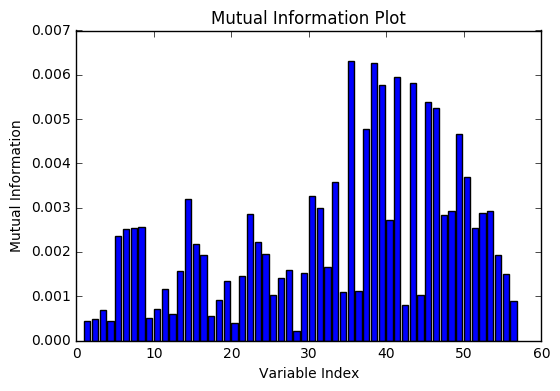

In [71]:
# MI feature selection
MI = mutual_info_classif(features,labels)
print MI

%matplotlib inline
plt.bar(range(1,len(MI)+1), MI)
plt.title("Mutual Information Plot")
plt.xlabel("Variable Index")
plt.ylabel("Mutual Information")

In [72]:
print len(np.array(range(len(MI)))[MI > 0.003])
print len(np.array(range(len(MI)))[MI > 0.004])
print len(np.array(range(len(MI)))[MI > 0.005])

13
9
7


In [73]:
df.columns.values[[i+1 for i in np.array(range(len(MI)))[MI > 0.004]]]

array(['zip_with_merchnum_7', 'cardnum_per_merch_3', 'cardnum_per_merch_7',
       'merchnum_per_card_3', 'zip_with_merchnum_14',
       'zip_with_merchnum_28', 'cardnum_per_merch_14',
       'cardnum_per_merch_28', 'merchant_frequency_3'], dtype=object)

In [74]:
MI[np.array(range(len(MI)))[MI > 0.004]]

array([ 0.00631545,  0.00477936,  0.00625549,  0.00576165,  0.00595777,
        0.00581137,  0.00539597,  0.00524356,  0.0046688 ])

In [75]:
# select only variables with MI larger than 0.005
selected = np.array(range(len(MI)))[MI > 0.004]
features_sub = features[:,selected]

clf = GaussianNB()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________NB________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = LogisticRegression()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________LR________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_leaf = 5, random_state = 42, n_jobs = 3)
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________RF________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = SVC()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________SVM________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = MLPClassifier()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________NN________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

_________NB________
Accuracy score is 0.964286117286
AUC score is 0.596933413468
FDR is 0.227118644068
_________LR________
Accuracy score is 0.996998454091
AUC score is 0.559288068814
FDR is 0.118644067797
_________RF________
Accuracy score is 0.998115570802
AUC score is 0.72370617017
FDR is 0.447457627119
_________SVM________
Accuracy score is 0.997133862177
AUC score is 0.569491525424
FDR is 0.138983050847
_________NN________
Accuracy score is 0.997348258313
AUC score is 0.608451932882
FDR is 0.216949152542


### Forward Feature Selection

In [11]:
# forward selection algorithm
def forward_selection(feature, label, clf, criteria):
    '''
    feature: ndarray of all the feature
    label: series of fraud label
    clf: classifier
    criteria: "accuracy", "AUC" or "FDR"
    
    print the whole feature selection process and feature selected in the end
    
    return the index list of features selected
    '''
    
    # initialize counter and comparison flag
    max_accuracy = 0
    added_features = []
    count = 0
    print "Starting........ Selection criteria is {crit}, baseline score is {baseline}".format(
        crit = criteria,
        baseline = max_accuracy)
    # loop until all the new models give a worse result
    while True:
        count += 1
        accuracy = {}
        # feature_lst is the list for all the feature indice except those features have been selected in previous round
        feature_lst = [i for i in range(feature.shape[1]) if i not in added_features]
        # add one feature in feature_list each time
        for i in feature_lst:
            feature_sub = feature[:,added_features+[i]]
            if count == 1:
                # change the shape of ndarray to make it acceptable for sklearn
                feature_sub = feature_sub.reshape(feature_sub.shape[0],1)
            # loop over to create a dict accuracy with feature index as key, and correponding accuracy as value
            clf_clone = clone(clf)
            clf_clone.fit(feature_sub, label)
            if criteria == "accuracy":
                accuracy[i] = clf_clone.score(feature_sub, label)
            elif criteria == "AUC":
                prediction = clf_clone.predict(feature_sub)
                accuracy[i] = roc_auc_score(label, prediction)
            elif criteria == "FDR":
                prediction = clf_clone.predict(feature_sub)
                matrix = confusion_matrix(label, prediction)
                accuracy[i] = matrix[1,1]/sum(label)
        # when the accuracy dict is empty, indicating it's the last round with no left features, end the loop
        if accuracy == {}:
            print "Forward selection ended."
            print "Selected features are ",
            print final_feature_lst
            return feature_index
            break
        # if it's not the last round, calculate the best result in current round
        current_max = max(accuracy.values())
        # if a not worse best result is generated, update added_features list
        if current_max >= max_accuracy:
            max_index = accuracy.keys()[accuracy.values().index(current_max)]
            added_features.append(max_index)
            feature_name = df.columns.values[max_index+1]
            # do not updated the final_feature_list until a better result is generated (always make sure fewer features)
            if current_max > max_accuracy:
                final_feature_lst = list(df.columns.values[[i+1 for i in added_features]])
                feature_index = list(added_features)
            # update maximum record
            max_accuracy = current_max
            print "Round number: {count_num}, the added feature is: {feature_selected}, maximum score is: {max_acc}\n".format(
            count_num = count,
            feature_selected = feature_name,
            max_acc = max_accuracy)
        # otherwise, all the results are worse, end the loop
        else:
            print "Forward selection ended."
            print "Selected features are ",
            print final_feature_lst
            return feature_index
            break

In [12]:
def test_comparison(feature_selected, clf):
    X_train_sub = X_train[:,feature_selected]
    clf.fit(X_train_sub, y_train)
    prediction_train = clf.predict(X_train_sub)
    matrix = confusion_matrix(y_train, prediction_train)
    train_acc = clf.score(X_train_sub, y_train)
    train_auc = roc_auc_score(y_train, prediction_train)
    train_fdr = matrix[1,1]/sum(y_train)
    
    X_test_sub = X_test[:,feature_selected]
    prediction_test = clf.predict(X_test_sub)
    matrix = confusion_matrix(y_test, prediction_test)
    test_acc = clf.score(X_test_sub, y_test)
    test_auc = roc_auc_score(y_test, prediction_test)
    test_fdr = matrix[1,1]/sum(y_test)
    
    comparison_df = pd.DataFrame({ "Accuracy": [train_acc, test_acc],
                                  "AUC score": [train_auc, test_auc],
                                  "FDR": [train_fdr, test_fdr]},
                                 index = ["Training", "Testing"])
    return comparison_df

### Gaussian Naive Bayes

In [13]:
clf = GaussianNB()
criteria = "AUC"
NB_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_7, maximum score is: 0.600636287171

Round number: 2, the added feature is: card_amount_to_median_28, maximum score is: 0.658679894424

Round number: 3, the added feature is: merchant_amount_to_median_28, maximum score is: 0.687871526354

Round number: 4, the added feature is: state_with_merchnum_3, maximum score is: 0.748679886665

Round number: 5, the added feature is: merchant_frequency_3, maximum score is: 0.788563417208

Round number: 6, the added feature is: card_frequency_7, maximum score is: 0.80726741863

Round number: 7, the added feature is: merchant_amount_to_avg_7, maximum score is: 0.818728501526

Round number: 8, the added feature is: card_frequency_3, maximum score is: 0.827108536924

Round number: 9, the added feature is: merchant_amount_to_avg_3, maximum score is: 0.828094403157

Forward selection ended.
Selected features are  ['zip_with_merchnum_7'

In [14]:
clf = GaussianNB()
test_comparison(NB_features, clf)

,AUC score,Accuracy,FDR
Training,0.828094,0.874154,0.781726
Testing,0.774275,0.874412,0.673469


**Gaussian Naive Bayes** Classifer does moderately well, and does not seem to suffer a lot from overfitting.

In [16]:
features_sub = df[['zip_with_merchnum_7', 'card_amount_to_median_28', 'merchant_amount_to_median_28', 'state_with_merchnum_3', 'merchant_frequency_3', 'card_frequency_7', 'merchant_amount_to_avg_7', 'card_frequency_3', 'merchant_amount_to_avg_3']]
clf = GaussianNB()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.796346238476


[[70346 17980]
 [   68   227]]


FDR is 0.769491525424


### Logistic Regression

In [17]:
clf = LogisticRegression()
criteria = "AUC"
LR_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 2, the added feature is: card_amount_to_median_7, maximum score is: 0.568527918782

Round number: 3, the added feature is: card_amount_to_max_3, maximum score is: 0.5786547288

Round number: 4, the added feature is: card_amount_to_avg_28, maximum score is: 0.581192799866

Round number: 5, the added feature is: state_with_merchnum_7, maximum score is: 0.583730870932

Round number: 6, the added feature is: merchnum_per_card_3, maximum score is: 0.583739362347

Round number: 7, the added feature is: merchnum_per_card_28, maximum score is: 0.583747853762

Round number: 8, the added feature is: card_amount_to_max_7, maximum score is: 0.588823995894

Round number: 9, the added feature is: card_amount_to_avg_3, maximum score is: 0.598984771574

Round number: 10, the added feature is: merchant_amount_to_avg_3, maximum score 

In [19]:
clf = LogisticRegression()
test_comparison(LR_features, clf)

,AUC score,Accuracy,FDR
Training,0.636988,0.997444,0.274112
Testing,0.576446,0.997021,0.153061


**Logistic Regression Model** performs poor. Althrough it's accuracy is not very low, it missed many frauds.

In [60]:
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'card_amount_to_max_3', 'card_amount_to_avg_28', 'state_with_merchnum_7', 'merchnum_per_card_3', 'merchnum_per_card_28', 'card_amount_to_max_7', 'card_amount_to_avg_3', 'merchant_amount_to_avg_3', 'card_amount_to_avg_7', 'merchant_amount_to_total_3', 'zip_with_merchnum_7', 'merchant_amount_to_avg_7', 'merchant_amount_to_total_7', 'card_amount_to_total_3', 'card_amount_to_total_7', 'merchant_amount_to_avg_14', 'merchant_amount_to_avg_28', 'merchant_amount_to_max_28', 'merchant_amount_to_max_14', 'merchant_amount_to_median_28', 'merchant_amount_to_max_3', 'cardnum_per_merch_7', 'card_amount_to_median_14', 'card_amount_to_median_3', 'card_amount_to_avg_14', 'card_amount_to_total_14', 'card_amount_to_max_14', 'merchant_amount_to_median_14', 'merchant_amount_to_total_14', 'zip_with_merchnum_3', 'merchnum_per_card_7', 'merchant_amount_to_median_3', 'state_with_merchnum_14', 'merchant_frequency_14', 'card_frequency_7', 'cardnum_per_merch_3', 'state_with_merchnum_3', 'zip_with_merchnum_28', 'state_with_merchnum_28', 'cardnum_per_merch_14', 'merchant_amount_to_max_7', 'card_frequency_3', 'merchant_amount_to_median_7']]
clf = LogisticRegression()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.997257986256


[[88312    14]
 [  229    66]]


FDR is 0.223728813559


### Decision Tree

In [20]:
clf = DecisionTreeClassifier()
criteria = "AUC"
DT_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: merchant_amount_to_avg_28, maximum score is: 0.977157360406

Round number: 2, the added feature is: card_amount_to_avg_14, maximum score is: 0.997461928934

Round number: 3, the added feature is: card_amount_to_avg_3, maximum score is: 0.997461928934

Round number: 4, the added feature is: card_amount_to_max_3, maximum score is: 0.997461928934

Round number: 5, the added feature is: card_amount_to_median_3, maximum score is: 0.997461928934

Round number: 6, the added feature is: card_amount_to_total_3, maximum score is: 0.997461928934

Round number: 7, the added feature is: merchant_amount_to_avg_3, maximum score is: 0.997461928934

Round number: 8, the added feature is: merchant_amount_to_max_3, maximum score is: 0.997461928934

Round number: 9, the added feature is: merchant_amount_to_median_3, maximum score is: 0.997461928934

Round number: 10, the added feature is: merchant_amount

In [112]:
clf = DecisionTreeClassifier()
test_comparison(DT_features, clf)

,AUC score,Accuracy,FDR
Training,0.997462,0.999983,0.994924
Testing,0.502979,0.992485,0.010204


**Single Decision Tree Classsifier** gives extremely overfitted output...

### Random Forest

In [21]:
clf = RandomForestClassifier(n_jobs = 3)
criteria = "AUC"
RF_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: merchant_amount_to_max_28, maximum score is: 0.883189291058

Round number: 2, the added feature is: merchant_frequency_3, maximum score is: 0.888316381681

Round number: 3, the added feature is: card_amount_to_total_14, maximum score is: 0.931472081218

Round number: 4, the added feature is: zip_with_merchnum_3, maximum score is: 0.936539731935

Round number: 5, the added feature is: card_frequency_7, maximum score is: 0.94923857868

Round number: 6, the added feature is: merchant_amount_to_median_7, maximum score is: 0.956852791878

Round number: 7, the added feature is: merchnum_per_card_7, maximum score is: 0.959390862944

Round number: 8, the added feature is: merchnum_per_card_28, maximum score is: 0.972081218274

Forward selection ended.
Selected features are  ['merchant_amount_to_max_28', 'merchant_frequency_3', 'card_amount_to_total_14', 'zip_with_merchnum_3', 'card_frequency_

In [22]:
clf = RandomForestClassifier(n_jobs = 3)
test_comparison(RF_features, clf)

,AUC score,Accuracy,FDR
Training,0.931472,0.999543,0.862944
Testing,0.642823,0.997563,0.285714


**Random Forest** with default setting overally performs well, althrough still suffers from overfitting to some extent.

In [37]:
clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
criteria = "AUC"
RF_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: merchant_amount_to_median_28, maximum score is: 0.857851037474

Round number: 2, the added feature is: merchant_amount_to_avg_3, maximum score is: 0.888290907436

Round number: 3, the added feature is: merchnum_per_card_14, maximum score is: 0.895896629219

Round number: 4, the added feature is: card_frequency_14, maximum score is: 0.906082879143

Round number: 5, the added feature is: zip_with_merchnum_28, maximum score is: 0.926395939086

Round number: 6, the added feature is: merchant_amount_to_max_14, maximum score is: 0.944162436548

Round number: 7, the added feature is: cardnum_per_merch_3, maximum score is: 0.946692016199

Round number: 8, the added feature is: card_amount_to_max_14, maximum score is: 0.946700507614

Round number: 9, the added feature is: merchant_amount_to_median_14, maximum score is: 0.964467005076

Forward selection ended.
Selected features are  ['merchant_

In [38]:
clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
test_comparison(RF_features, clf)

,AUC score,Accuracy,FDR
Training,0.964467,0.999763,0.928934
Testing,0.678571,0.997867,0.357143


In [43]:
clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, min_samples_leaf = 5, random_state = 42, n_jobs = 3)
criteria = "AUC"
RF_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 2, the added feature is: merchant_amount_to_max_7, maximum score is: 0.601480385564

Round number: 3, the added feature is: cardnum_per_merch_28, maximum score is: 0.626869587639

Round number: 4, the added feature is: merchant_frequency_28, maximum score is: 0.725845867797

Round number: 5, the added feature is: card_amount_to_median_28, maximum score is: 0.74364633092

Round number: 6, the added feature is: merchnum_per_card_14, maximum score is: 0.758883248731

Round number: 7, the added feature is: card_frequency_7, maximum score is: 0.784263959391

Round number: 8, the added feature is: cardnum_per_merch_14, maximum score is: 0.796954314721

Round number: 9, the added feature is: merchant_amount_to_median_28, maximum score is: 0.812182741117

Round number: 10, the added feature is: cardnum_per_merch_7, maximum s

In [44]:
clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, min_samples_leaf = 5, random_state = 42, n_jobs = 3)
test_comparison(RF_features, clf)

,AUC score,Accuracy,FDR
Training,0.822335,0.998815,0.644670
Testing,0.719371,0.998104,0.438776


In [45]:
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_leaf = 5, random_state = 42, n_jobs = 3)
criteria = "AUC"
RF_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 2, the added feature is: merchant_amount_to_max_7, maximum score is: 0.601497368394

Round number: 3, the added feature is: cardnum_per_merch_28, maximum score is: 0.626878079054

Round number: 4, the added feature is: merchant_frequency_28, maximum score is: 0.725845867797

Round number: 5, the added feature is: merchnum_per_card_28, maximum score is: 0.751243561287

Round number: 6, the added feature is: card_frequency_3, maximum score is: 0.781725888325

Round number: 7, the added feature is: card_amount_to_median_28, maximum score is: 0.791878172589

Round number: 8, the added feature is: merchant_amount_to_max_28, maximum score is: 0.794416243655

Round number: 9, the added feature is: merchant_frequency_14, maximum score is: 0.814720812183

Forward selection ended.
Selected features are  ['zip_with_merchnum_14'

In [46]:
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_leaf = 5, random_state = 42, n_jobs = 3)
test_comparison(RF_features, clf)

,AUC score,Accuracy,FDR
Training,0.814721,0.998764,0.629442
Testing,0.719388,0.998138,0.438776


Tunned a little bit, and FDR on testing data improved.

In [59]:
features_sub = df[['zip_with_merchnum_14', 'merchant_amount_to_max_7', 'cardnum_per_merch_28', 'merchant_frequency_28', 'merchnum_per_card_28', 'card_frequency_3', 'card_amount_to_median_28', 'merchant_amount_to_max_28', 'merchant_frequency_14']]
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_leaf = 5, random_state = 42, n_jobs = 3)
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.99860078311


[[88326     0]
 [  124   171]]


FDR is 0.579661016949


### Support Vector Machine

In [27]:
clf = SVC()
criteria = "AUC"
SVM_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 2, the added feature is: card_amount_to_median_7, maximum score is: 0.568527918782

Round number: 3, the added feature is: card_frequency_7, maximum score is: 0.614196215139

Round number: 4, the added feature is: merchnum_per_card_28, maximum score is: 0.619280848686

Round number: 5, the added feature is: card_amount_to_max_14, maximum score is: 0.621818919752

Round number: 6, the added feature is: merchant_amount_to_avg_14, maximum score is: 0.624356990818

Round number: 7, the added feature is: merchant_amount_to_median_3, maximum score is: 0.631971204016

Round number: 8, the added feature is: merchant_amount_to_median_28, maximum score is: 0.670042270006

Round number: 9, the added feature is: merchant_amount_to_median_14, maximum score is: 0.682732625336

Round number: 10, the added feature is: merchant_amoun

In [28]:
clf = SVC()
test_comparison(SVM_features, clf)

,AUC score,Accuracy,FDR
Training,0.703037,0.998003,0.406091
Testing,0.591820,0.997258,0.183673


**SVM** performs moderatelly well. Not much overfitting seen.

In [29]:
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'card_frequency_7', 'merchnum_per_card_28', 'card_amount_to_max_14', 'merchant_amount_to_avg_14', 'merchant_amount_to_median_3', 'merchant_amount_to_median_28', 'merchant_amount_to_median_14', 'merchant_amount_to_avg_28', 'merchant_amount_to_avg_7', 'cardnum_per_merch_28', 'cardnum_per_merch_7', 'merchant_amount_to_avg_3', 'zip_with_merchnum_3']]
clf = SVC()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.997901174665


[[88324     2]
 [  184   111]]


FDR is 0.376271186441


### Neural Network (Multi-Layer Perceptron Classifier)

In [30]:
clf = MLPClassifier(activation = "logistic")
criteria = "AUC"
NN_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_28, maximum score is: 0.540609137056

Round number: 2, the added feature is: state_with_merchnum_14, maximum score is: 0.55076142132

Round number: 3, the added feature is: merchant_amount_to_avg_7, maximum score is: 0.555837563452

Round number: 4, the added feature is: card_amount_to_median_28, maximum score is: 0.560913705584

Round number: 5, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 6, the added feature is: merchant_amount_to_median_28, maximum score is: 0.56345177665

Round number: 7, the added feature is: card_frequency_7, maximum score is: 0.57614213198

Round number: 8, the added feature is: cardnum_per_merch_7, maximum score is: 0.647165664752

Round number: 9, the added feature is: merchnum_per_card_14, maximum score is: 0.692791504033

Round number: 10, the added feature is: merchant_amount_to_median_3, max

In [31]:
clf = MLPClassifier()
test_comparison(NN_features, clf)

,AUC score,Accuracy,FDR
Training,0.768976,0.998341,0.538071
Testing,0.698946,0.997935,0.397959


In [32]:
clf = MLPClassifier()
criteria = "AUC"
NN_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 2, the added feature is: card_amount_to_median_3, maximum score is: 0.565989847716

Round number: 3, the added feature is: merchant_amount_to_avg_28, maximum score is: 0.570887670129

Round number: 4, the added feature is: card_amount_to_median_14, maximum score is: 0.588730590327

Round number: 5, the added feature is: merchant_frequency_3, maximum score is: 0.616547475071

Round number: 6, the added feature is: card_frequency_3, maximum score is: 0.657343423261

Round number: 7, the added feature is: merchnum_per_card_7, maximum score is: 0.70808786175

Round number: 8, the added feature is: cardnum_per_merch_14, maximum score is: 0.743612365259

Round number: 9, the added feature is: merchnum_per_card_3, maximum score is: 0.766455004853

Round number: 10, the added feature is: cardnum_per_merch_28, maximum score i

In [33]:
clf = MLPClassifier()
test_comparison(NN_features, clf)

,AUC score,Accuracy,FDR
Training,0.789298,0.998510,0.578680
Testing,0.704014,0.997901,0.408163


**Neural Network** performs quite impressive compared to other models.

In [34]:
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_3', 'merchant_amount_to_avg_28', 'card_amount_to_median_14', 'merchant_frequency_3', 'card_frequency_3', 'merchnum_per_card_7', 'cardnum_per_merch_14', 'merchnum_per_card_3', 'cardnum_per_merch_28', 'merchant_frequency_28', 'merchant_amount_to_median_3', 'card_amount_to_max_14']]
clf = MLPClassifier()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)
print "Number of Layers is", clf.n_layers_

accuracy is 0.998420238995


[[88308    18]
 [  122   173]]


FDR is 0.586440677966
Number of Layers is 3


### Save scores

In [61]:
# NB
features_sub = df[['zip_with_merchnum_7', 'card_amount_to_median_28', 'merchant_amount_to_median_28', 'state_with_merchnum_3', 'merchant_frequency_3', 'card_frequency_7', 'merchant_amount_to_avg_7', 'card_frequency_3', 'merchant_amount_to_avg_3']]
clf = GaussianNB()
clf.fit(features_sub, labels)
NB_scores = clf.predict_proba(features_sub)[:,1]
NB_scores_df = pd.DataFrame({"NB": NB_scores})

# LR
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'card_amount_to_max_3', 'card_amount_to_avg_28', 'state_with_merchnum_7', 'merchnum_per_card_3', 'merchnum_per_card_28', 'card_amount_to_max_7', 'card_amount_to_avg_3', 'merchant_amount_to_avg_3', 'card_amount_to_avg_7', 'merchant_amount_to_total_3', 'zip_with_merchnum_7', 'merchant_amount_to_avg_7', 'merchant_amount_to_total_7', 'card_amount_to_total_3', 'card_amount_to_total_7', 'merchant_amount_to_avg_14', 'merchant_amount_to_avg_28', 'merchant_amount_to_max_28', 'merchant_amount_to_max_14', 'merchant_amount_to_median_28', 'merchant_amount_to_max_3', 'cardnum_per_merch_7', 'card_amount_to_median_14', 'card_amount_to_median_3', 'card_amount_to_avg_14', 'card_amount_to_total_14', 'card_amount_to_max_14', 'merchant_amount_to_median_14', 'merchant_amount_to_total_14', 'zip_with_merchnum_3', 'merchnum_per_card_7', 'merchant_amount_to_median_3', 'state_with_merchnum_14', 'merchant_frequency_14', 'card_frequency_7', 'cardnum_per_merch_3', 'state_with_merchnum_3', 'zip_with_merchnum_28', 'state_with_merchnum_28', 'cardnum_per_merch_14', 'merchant_amount_to_max_7', 'card_frequency_3', 'merchant_amount_to_median_7']]
clf = LogisticRegression()
clf.fit(features_sub, labels)
LR_scores = clf.predict_proba(features_sub)[:,1]
LR_scores_df = pd.DataFrame({"LR": LR_scores})

In [62]:
# RF
features_sub = df[['zip_with_merchnum_14', 'merchant_amount_to_max_7', 'cardnum_per_merch_28', 'merchant_frequency_28', 'merchnum_per_card_28', 'card_frequency_3', 'card_amount_to_median_28', 'merchant_amount_to_max_28', 'merchant_frequency_14']]
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_leaf = 5, random_state = 42, n_jobs = 3)
clf.fit(features_sub, labels)
RF_scores = clf.predict_proba(features_sub)[:,1]
RF_scores_df = pd.DataFrame({"RF": RF_scores})

In [63]:
# SVM
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'card_frequency_7', 'merchnum_per_card_28', 'card_amount_to_max_14', 'merchant_amount_to_avg_14', 'merchant_amount_to_median_3', 'merchant_amount_to_median_28', 'merchant_amount_to_median_14', 'merchant_amount_to_avg_28', 'merchant_amount_to_avg_7', 'cardnum_per_merch_28', 'cardnum_per_merch_7', 'merchant_amount_to_avg_3', 'zip_with_merchnum_3']]
clf = SVC()
clf.fit(features_sub, labels)
SVM_scores = clf.predict(features_sub)
SVM_scores_df = pd.DataFrame({"SVM": SVM_scores})

In [64]:
# NN
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_3', 'merchant_amount_to_avg_28', 'card_amount_to_median_14', 'merchant_frequency_3', 'card_frequency_3', 'merchnum_per_card_7', 'cardnum_per_merch_14', 'merchnum_per_card_3', 'cardnum_per_merch_28', 'merchant_frequency_28', 'merchant_amount_to_median_3', 'card_amount_to_max_14']]
clf = MLPClassifier()
clf.fit(features_sub, labels)
NN_scores = clf.predict_proba(features_sub)[:,1]
NN_scores_df = pd.DataFrame({"NN": NN_scores})

In [65]:
score_df = pd.concat([NB_scores_df, LR_scores_df, RF_scores_df, SVM_scores_df, NN_scores_df], axis=1)

In [66]:
score_df.index = df.index

In [67]:
score_df

,NB,LR,RF,SVM,NN
6387,3.404842e-01,3.921922e-03,0.000000,0.0,2.472640e-03
6388,3.613225e-01,1.070882e-03,0.000000,0.0,6.669514e-04
6389,3.809107e-01,2.090709e-04,0.000000,0.0,6.467624e-06
6390,3.525849e-01,1.606118e-03,0.000000,0.0,7.360208e-05
6391,4.651333e-01,3.153660e-03,0.000000,0.0,4.142533e-03
6392,9.754979e-15,2.190598e-06,0.000000,0.0,7.461036e-14
6393,4.511036e-15,2.288421e-06,0.000000,0.0,1.438351e-13
6394,1.437577e-15,7.475549e-07,0.000000,0.0,2.706684e-15
6395,3.162768e-01,2.150531e-03,0.000000,0.0,3.594412e-03
6396,3.311566e-01,6.061353e-04,0.000000,0.0,2.814273e-03


In [68]:
score_df.to_csv("Fraud Scores.csv")

In [70]:
# store all the variables for subsequent use
%store data
%store df
%store features
%store labels
%store X_train
%store X_test
%store y_train
%store y_test
%store data
%store NB_features
%store LR_features
%store RF_features
%store SVM_features
%store NN_features

Stored 'data' (DataFrame)
Stored 'df' (DataFrame)
Stored 'features' (ndarray)
Stored 'labels' (Series)
Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'data' (DataFrame)
Stored 'NB_features' (list)
Stored 'LR_features' (list)
Stored 'RF_features' (list)
Stored 'SVM_features' (list)
Stored 'NN_features' (list)
